## Lab2 
#####   - Name: Xinyi Li   
#####   - StudentID:21147426

### A. Import Python Modules and Dataset

In [270]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("./bank.csv")
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,secondary,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,primary,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,primary,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,secondary,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


check missing value

In [271]:
df.isna().sum()

age            12
job            10
marital         0
education     104
default         0
balance         0
housing         0
loan            0
contact       191
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome      454
subscribed      0
dtype: int64

In [272]:
df_original = df

### B. Process and Encode the Categorical Features

##### Encode Ordinal Categorical Attributes

In [273]:
# Nonecolumns is unlikely to contain useful information and so no need to be dropped.
# Create a mapper
scale_mapper = {
    "primary": 0,
    "secondary": 1,
    "tertiary": 2
}

df['education'] = df['education'].replace(scale_mapper)

df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20.0,student,single,NaN,no,2785,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28.0,admin.,single,1.0,no,127,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81.0,retired,married,0.0,no,1154,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46.0,services,married,0.0,no,4343,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40.0,entrepreneur,married,1.0,no,6403,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


#Note that there's one categorical column **ordinal** is the education. All ohter categorical columns are **nominal**.

##### One-Hot Encode All Other Categorical Attributes

In [274]:
# first one-hot encode the categorical columns with NaNs
df = pd.get_dummies(df, columns=['job','contact','poutcome'], 
                        dummy_na=True, 
                        drop_first=True)
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,NaN,no,2785,no,no,16,sep,327,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,1.0,no,127,no,no,16,sep,1334,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,1154,no,no,17,sep,231,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,4343,yes,no,20,sep,185,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,1.0,no,6403,no,no,22,sep,208,...,0,0,0,0,0,0,0,0,0,1


### C.Handling of missing values in numeric columns

##### check missing value

In [275]:
# Find the number of nulls/NaNs in the dataset

df.isna().sum()

age                   12
marital                0
education            104
default                0
balance                0
housing                0
loan                   0
day                    0
month                  0
duration               0
campaign               0
pdays                  0
previous               0
subscribed             0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_nan                0
contact_telephone      0
contact_nan            0
poutcome_other         0
poutcome_success       0
poutcome_nan           0
dtype: int64

##### insert missing value

let us look at the following boxplots to see if a trend exists:

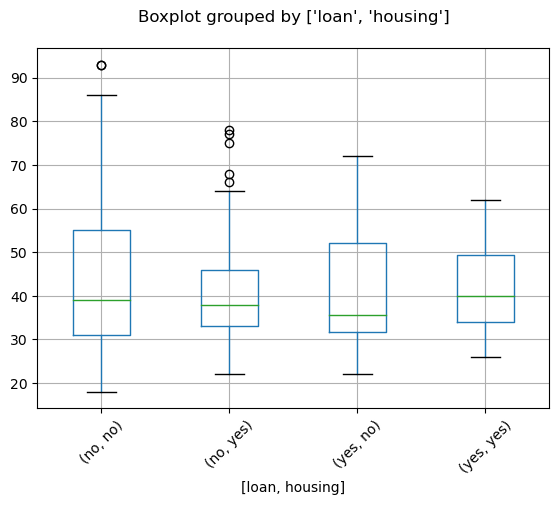

In [276]:
df.boxplot(column='age', by=['loan','housing'], rot=45)
plt.title("")
plt.show()

We can see some variation in the median of `age` for each group and these medians can be used for imputing the missing values in each group. Next, we create a pivot table, which contains the median values for all four groups.

In [277]:
ptable = df.pivot_table(values='age', 
                        index='loan',
                        columns='housing',  
                        aggfunc=np.median)
ptable

housing,no,yes
loan,,
no,39.0,38.0
yes,35.5,40.0


Finally, we define a function, which returns the values in the pivot table and apply it to fill the missing values of `age`.

In [278]:
# Define function to return an element of the pivot table
def get_element(x):
    return ptable.loc[x['loan'], x['housing']]

# Replace missing values
df['age'].fillna(df[df['age'].isnull()].apply(get_element, axis=1), inplace=True)

In [279]:
#It can also be filled with the median
#df['age'].fillna(df['age'].median(), inplace=True)
df['education'].fillna(df['education'].median(), inplace=True)

### D. Rescaling Features

In [280]:
robust_scaler = RobustScaler()
df[['balance',
    'duration']] = robust_scaler.fit_transform(df[['balance',
                                                     'duration']])

In [281]:
df['education'] = df['education']/2

### E. Treatment of Outliers

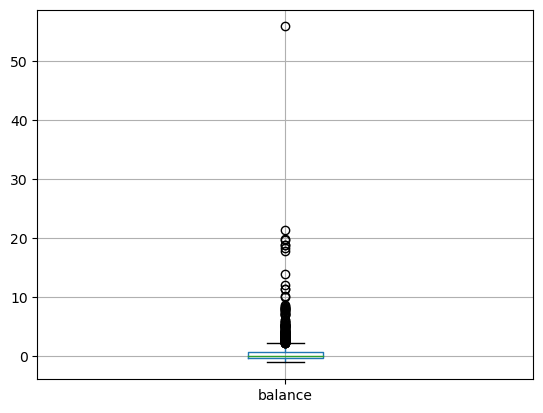

In [282]:
df.boxplot(column=['balance'])
plt.show()

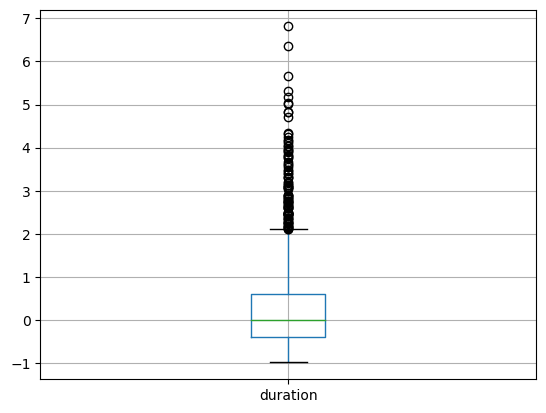

In [283]:
df.boxplot(column=['duration'])
plt.show()

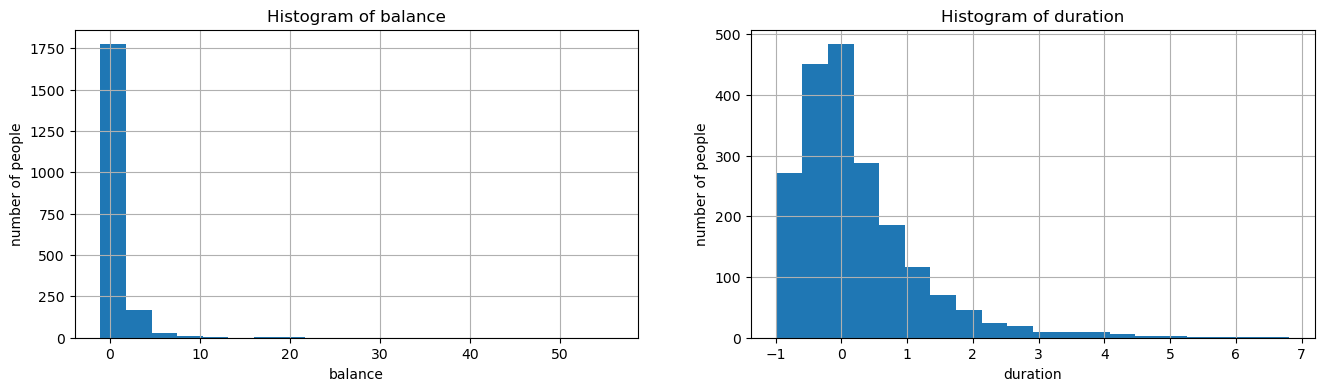

In [284]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance")
ax1.set_xlabel('balance')
ax1.set_ylabel('number of people')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration")
ax3.set_xlabel('duration')
ax3.set_ylabel('number of people')
df['duration'].hist(bins=20)

plt.show()

In [285]:
df[['balance', 'duration']].min()

balance    -1.060984
duration   -0.982833
dtype: float64

In [286]:
# Use a log transformation to decrease the impact of outliers
df['balance'] = np.log(df['balance'] + abs(min(df['balance'])) + 1)
df['duration'] = np.log(df['duration'] + abs(min(df['duration'])) + 1)

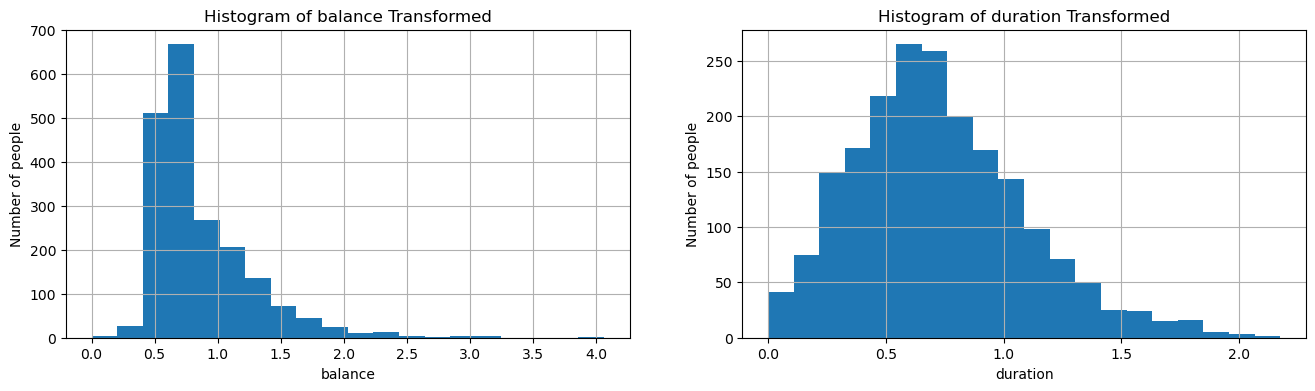

In [287]:
# Create figure with two subplots
fig = plt.figure(figsize=(16,4))

# Plot ApplicantIncome
ax1 = fig.add_subplot(1, 2, 1)
ax1.set_title("Histogram of balance Transformed")
ax1.set_xlabel('balance')
ax1.set_ylabel('Number of people')
df['balance'].hist(bins=20)

# Plot LoanAmount
ax3 = fig.add_subplot(1, 2, 2)
ax3.set_title("Histogram of duration Transformed")
ax3.set_xlabel('duration')
ax3.set_ylabel('Number of people')
df['duration'].hist(bins=20)

plt.show()

### F. Creation of derived features

In [288]:
scale_mapper = {
    "no": 0,
    "yes": 1
}

df['loan'] = df['loan'].replace(scale_mapper)
df['housing'] = df['housing'].replace(scale_mapper)

df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_services,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan
1995,20.0,single,0.5,no,1.283472,0,0,16,sep,0.864320,...,0,1,0,0,0,0,0,0,0,1
1996,28.0,single,0.5,no,0.569369,0,0,16,sep,1.901403,...,0,0,0,0,0,0,0,0,0,1
1997,81.0,married,0.0,no,0.907800,0,0,17,sep,0.673645,...,0,0,0,0,0,1,0,0,0,1
1998,46.0,married,0.0,no,1.545186,1,0,20,sep,0.567555,...,1,0,0,0,0,0,1,0,0,1
1999,40.0,married,0.5,no,1.810978,0,0,22,sep,0.622006,...,0,0,0,0,0,0,0,0,0,1


I created TotalLoan comprehensive means housing and  loan, 0 means no loan pressure, 0~1 means there is a little loan pressure (there is one loan), > 1 means there is a very serious loan pressure (there are two kinds of loans)

In [290]:
# Create TotalLoan column and apply a log transformation
df['TotalLoan'] = df['loan'] + df['housing']
df[['TotalLoan']] = robust_scaler.fit_transform(df[['TotalLoan']])
df[['TotalLoan']].min()

TotalLoan   -1.0
dtype: float64

In [291]:
df['TotalLoan'] = np.log(df['TotalLoan']+2)

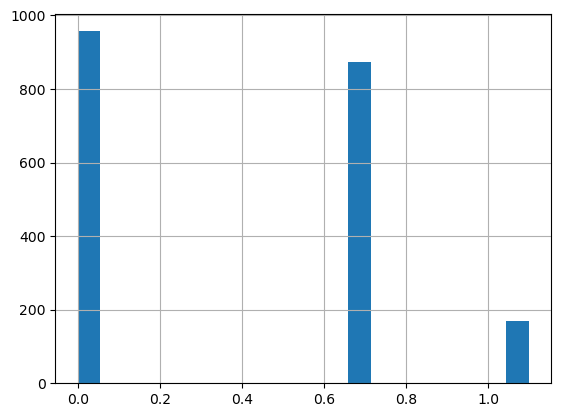

In [292]:
df['TotalLoan'].hist(bins=20)
plt.show()

The first bar graph shows the number of people with no loan stress (no loan 0.000000), the second bar shows the number of people with average loan stress (has a type of loan 	0.693147), and the third bar shows the number of people with high loan stress ( The number of people with two types of loans	1.098612)

In [294]:
df.head()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,TotalLoan
0,32.0,single,1.0,no,0.668238,1,0,1,apr,1.624770,...,0,1,0,0,0,0,0,0,0,0.693147
1,39.0,divorced,0.5,no,0.768220,1,1,1,apr,0.678012,...,0,1,0,0,0,0,0,0,0,1.098612
2,59.0,married,0.5,no,0.873966,1,1,1,apr,0.412593,...,0,0,0,0,0,0,0,0,0,1.098612
3,47.0,married,0.5,no,0.670367,1,1,1,apr,0.763570,...,0,0,0,0,0,0,0,0,0,1.098612
4,54.0,married,0.5,no,0.864961,1,0,1,apr,1.107159,...,0,0,0,0,0,0,0,0,0,0.693147


In [295]:
df.tail()

,age,marital,education,default,balance,housing,loan,day,month,duration,...,job_student,job_technician,job_unemployed,job_nan,contact_telephone,contact_nan,poutcome_other,poutcome_success,poutcome_nan,TotalLoan
1995,20.0,single,0.5,no,1.283472,0,0,16,sep,0.864320,...,1,0,0,0,0,0,0,0,1,0.000000
1996,28.0,single,0.5,no,0.569369,0,0,16,sep,1.901403,...,0,0,0,0,0,0,0,0,1,0.000000
1997,81.0,married,0.0,no,0.907800,0,0,17,sep,0.673645,...,0,0,0,0,1,0,0,0,1,0.000000
1998,46.0,married,0.0,no,1.545186,1,0,20,sep,0.567555,...,0,0,0,0,0,1,0,0,1,0.693147
1999,40.0,married,0.5,no,1.810978,0,0,22,sep,0.622006,...,0,0,0,0,0,0,0,0,1,0.000000


### G. Save the prepared dataset

Finally, let's save the prepared dataset as a CSV file.

In [296]:
df.to_csv('bank_prepared.csv')